In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv file and convert into dataframe
df1 = pd.read_csv('Country-Code.csv')
df1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [3]:
df2 = pd.read_csv('zomato.csv',engine='python',encoding='ISO-8859-1')
df2.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [4]:
# let's merge the dataframes
df = pd.merge(df1,df2,on='Country Code')
df.head(2)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71


In [5]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)
df.head(2)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71


## Observations:
### Firstly we observe the dataset:

- Country Code: Country in which restaurant is located
- Country: name of the country
- Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant
- City: City in which restaurant is located
- Address: Address of the restaurant
- Locality: Location in the city
- Locality Verbose: Detailed description of the locality
- Longitude: Longitude coordinate of the restaurant
- Latitude: Latitude coordinate of the restaurant
- Cuisines: Cuisines offered by the restaurant
- Average Cost for two: Cost for two people in different currencies
- Currency: Currency of the country
- Has Table booking: yes/no
- Has Online delivery: yes/ no
- Is delivering: yes/ no
- Switch to order menu: yes/no
- Price range: range of price of food
- Aggregate Rating: Average rating out of 5
- Rating color: depending upon the average rating color
- Rating text: text on the basis of rating of rating
- Votes: Number of ratings casted by people

## Problem statement : In this dataset predict 2 things –
- Average Cost for two
- Price range


In [6]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
df.shape

(9551, 22)

### We have 9551 rows and 22 columns

In [8]:
df.isna().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Cuisines column has null values present

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

### Most of the features are having object type values .we will use encoding techniques to handles this situation.


In [10]:
# let's check the duplicate rows present or not in this dataset
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Country Code, Country, Restaurant ID, Restaurant Name, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes]
Index: []


### There is no duplicates present

In [11]:
df.nunique()

Country Code              15
Country                   15
Restaurant ID           9551
Restaurant Name         7446
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [12]:
# lets drop unnecessary columns from dataset
df.drop(columns='Switch to order menu',inplace =True)
df.drop(columns=['Country Code','Restaurant ID','Address','Locality Verbose','Is delivering now'],inplace =True)


In [13]:
# stats about data
df.describe()

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


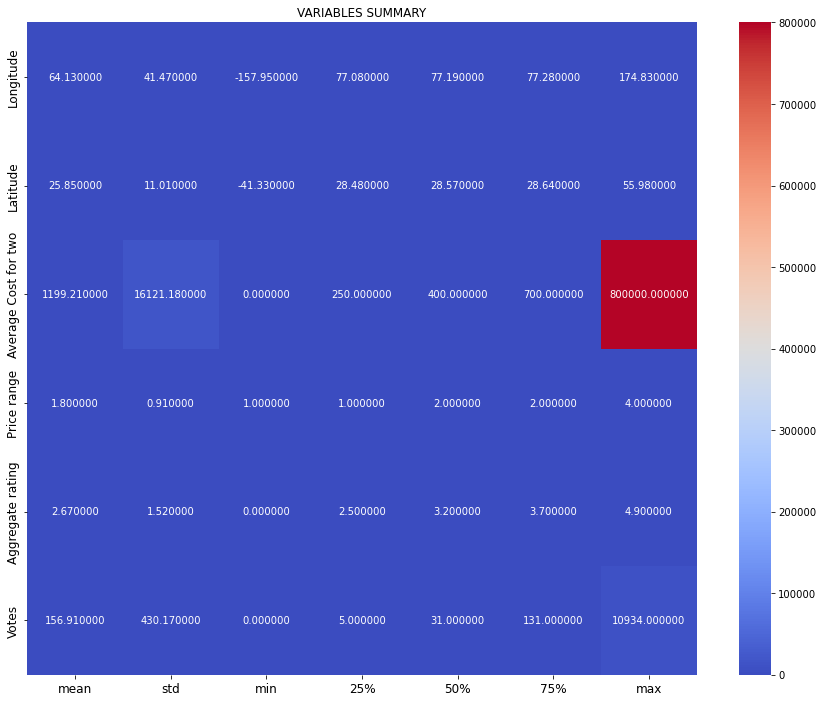

In [14]:
df.describe()
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,fmt='f',cmap='coolwarm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("VARIABLES SUMMARY")
plt.show()

## Observations:-
- In variable summery Average Cost for two and Votes indicating the presence of outliers



In [15]:
# print all the datatypes and unique values
for column in df.columns:
    if df[column].dtype== object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('---------------------------------------------------------------------------------')

Country:['India' 'Australia' 'Brazil' 'Canada' 'Indonesia' 'New Zealand'
 'Phillipines' 'Qatar' 'Singapore' 'South Africa' 'Sri Lanka' 'Turkey'
 'UAE' 'United Kingdom' 'United States']
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64
---------------------------------------------------------------------------------
Restaurant Name:['Jahanpanah' 'Rangrezz Restaurant' 'Time2Eat - Mama Chicken' ...
 'Tokyo Japanese Steak House' "Theo Yianni's Authentic Greek Restaurant"
 "Fishpatrick's Crabby Cafe"]
Cafe Coffee Day                                           83
Domino's Pizza                                            79
Subway                                               

# EDA

In [26]:
categorical = df.select_dtypes(include=['object'])
categorical.head()


,Country,Restaurant Name,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Rating color,Rating text
0,India,Jahanpanah,Agra,Agra Cantt,"North Indian, Mughlai",Indian Rupees(Rs.),No,No,Yellow,Good
1,India,Rangrezz Restaurant,Agra,Agra Cantt,"North Indian, Mughlai",Indian Rupees(Rs.),No,No,Yellow,Good
2,India,Time2Eat - Mama Chicken,Agra,Agra Cantt,North Indian,Indian Rupees(Rs.),No,No,Yellow,Good
3,India,Chokho Jeeman Marwari Jain Bhojanalya,Agra,Civil Lines,Rajasthani,Indian Rupees(Rs.),No,No,Green,Very Good
4,India,Pinch Of Spice,Agra,Civil Lines,"North Indian, Chinese, Mughlai",Indian Rupees(Rs.),No,No,Green,Very Good


<AxesSubplot:xlabel='Price range', ylabel='count'>

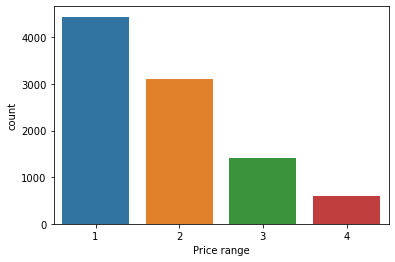

In [17]:
sns.countplot(x='Price range',data=df)

In [18]:
df['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

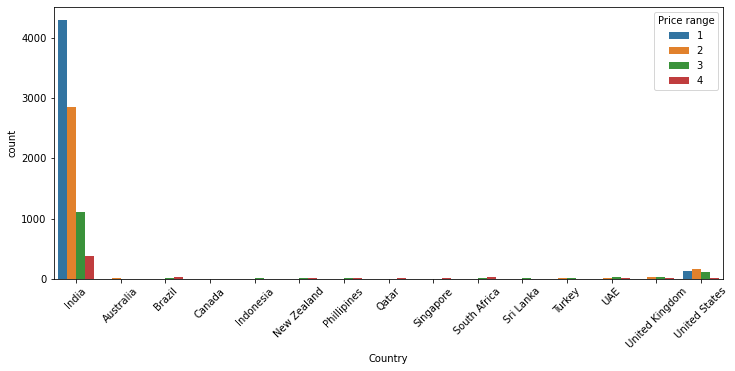

In [25]:
plt.figure(figsize=(12,5))
sns.countplot(x='Country',hue='Price range',data=df)
plt.xticks(rotation=45)
plt.show()

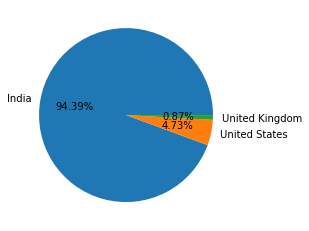

In [16]:
#pie chart to represent the country where zomato is widely used
plt.pie(df["Country"].value_counts().head(3),labels=df["Country"].value_counts().head(3).index,autopct="%1.2f%%")
plt.show()

### Zomato most of the  transactions are from India followed by United States and then United Kingdom

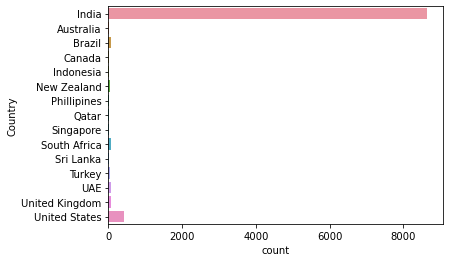

In [17]:
# lets visualize the all countries
sns.countplot(y= df['Country'],data= df)
plt.show()

In [18]:
df['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

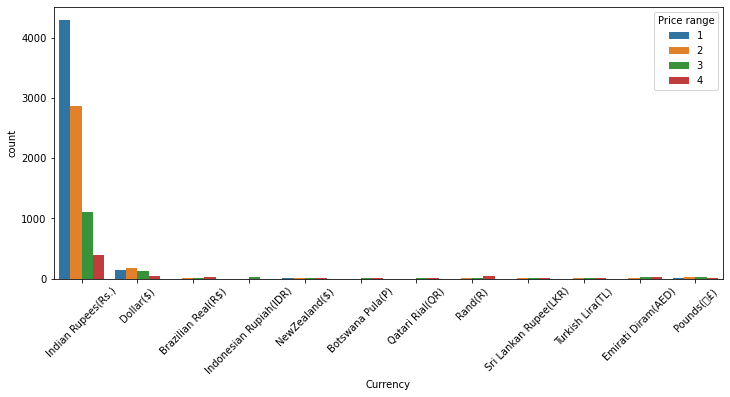

In [28]:
plt.figure(figsize=(12,5))
sns.countplot(x='Currency',hue='Price range',data=df)
plt.xticks(rotation=45)
plt.show()

In [29]:
df.groupby('Price range')['Currency'].value_counts()


Price range  Currency              
1            Indian Rupees(Rs.)        4295
             Dollar($)                  140
             Pounds(£)                   4
             NewZealand($)                3
             Brazilian Real(R$)           2
2            Indian Rupees(Rs.)        2858
             Dollar($)                  183
             Pounds(£)                  28
             Turkish Lira(TL)            11
             Emirati Diram(AED)           9
             Brazilian Real(R$)           7
             Sri Lankan Rupee(LKR)        6
             NewZealand($)                4
             Rand(R)                      4
             Botswana Pula(P)             1
             Indonesian Rupiah(IDR)       1
             Qatari Rial(QR)              1
3            Indian Rupees(Rs.)        1111
             Dollar($)                  120
             Pounds(£)                  32
             Emirati Diram(AED)          29
             Indonesian Rupiah(IDR)     

## Understanding the ratings


In [30]:
ratings = df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings


,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


### Obseravtions: The above information helps us to understand the relationship between 'Aggregate rating', 'Rating color' and 'Rating text'. We conclude the following color assigned to the ratings:

- Rating 0 - White - Not rated

- Rating 1.8 to 2.4 - Red - Poor

- Rating 2.5 to 3.4 - Orange - Average

- Rating 3.5 to 3.9 - Yellow - Good

- Rating 4.0 to 4.4 - Green - Very Good

- Rating 4.5 to 4.9 - Dark Green - Excellent


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

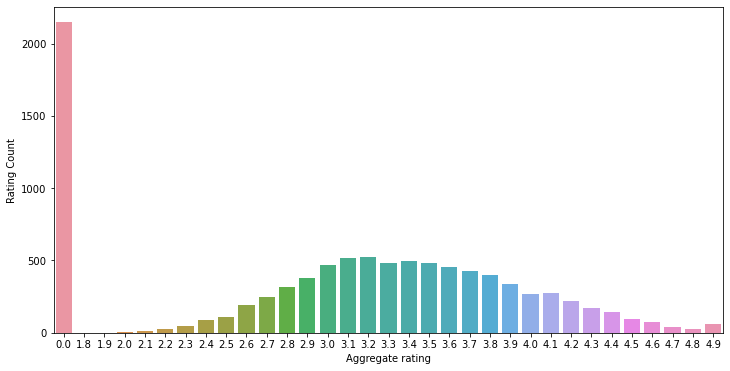

In [31]:
#plotting the count of each rating
plt.figure(figsize=(12,6))
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings)


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

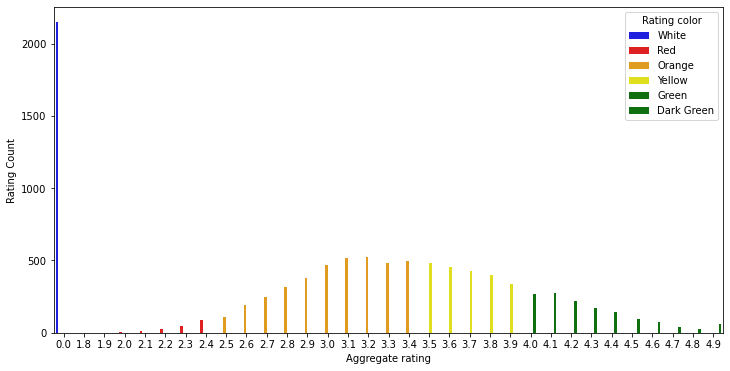

In [32]:
#plotting the count of rating with the color assigned to them in the dataset 
plt.figure(figsize=(12,6))
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings,hue="Rating color",palette=["blue","red","orange","yellow","green","green"])


### Observation:

- Not rated count is the highest
- Maximum ratings are between 2.5 to 3.4


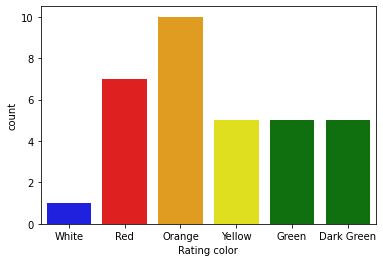

In [33]:
sns.countplot(x='Rating color' ,data = ratings,palette=["blue","red","orange","yellow","green","green"] )
plt.show()

In [34]:
No_rating = df[df['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
No_rating


,Country,Rating Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


### Maximum no. of 0 ratings are from Indian Customers

## Understanding Currency

In [35]:
#the currency which is used in different country 
df.groupby(["Country",'Currency']).size().reset_index().rename(columns={0:"Count"})



,Country,Currency,Count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [36]:
# no. of outlets in zomato which accepts online delivery
df["Has Online delivery"].value_counts()


No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

In [37]:
#country where the resturants on zomato are providing the online delivery option 
df[df["Has Online delivery"]=="Yes"].groupby("Country").size()


Country
India    2423
UAE        28
dtype: int64

In [38]:
country_online_delivery = df.groupby(["Has Online delivery", 'Country']).size().reset_index(name='count')
country_online_delivery


,Has Online delivery,Country,count
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


<AxesSubplot:xlabel='Country', ylabel='count'>

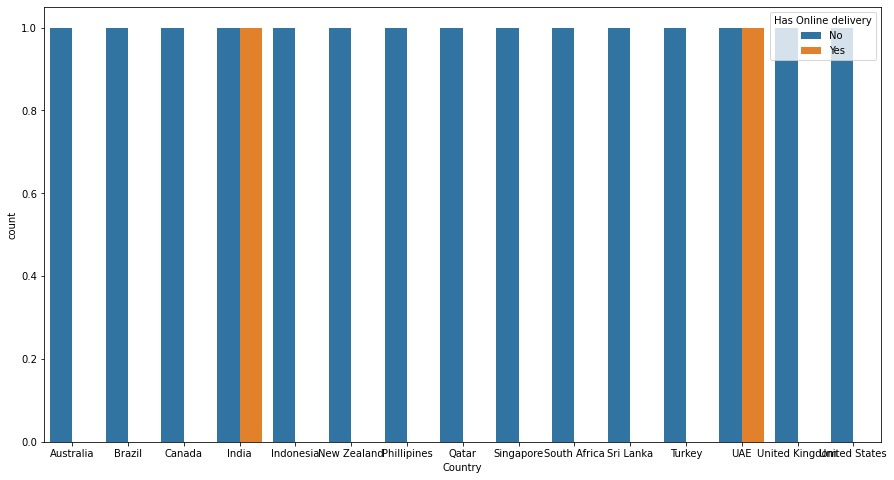

In [39]:
plt.figure(figsize=(15,8))
sns.countplot(hue='Has Online delivery',x='Country',data=country_online_delivery)

### Online delivery is available in India and UAE only



In [40]:
# no. of outlets in zomato which accepts table booking
df["Has Table booking"].value_counts()


No     8393
Yes    1158
Name: Has Table booking, dtype: int64

In [41]:
#locality where the resturants on zomato are providing the table booking option 
df[df["Has Table booking"]=="Yes"].groupby("Locality").size()


Locality
 ILD Trade Centre Mall, Sohna Road                      1
12th Square Building, Banjara Hills                     1
Adchini                                                 5
Addition Hills                                          1
Aditya Mega Mall, Karkardooma                           2
Adyar                                                   1
Aerocity                                                1
Aggarwal City Mall, Pitampura                           2
Aggarwal City Plaza, Rohini                             1
Al Barari                                               1
Al Dhafrah                                              1
Al Karama                                               2
Albemarle Street, Mayfair                               1
Ambience Mall, Gurgaon                                  2
Ambience Mall, Vasant Kunj                              4
Anand Lok                                               1
Andaz Delhi, Aerocity                                   1
Anna 

In [42]:
zomato_locality_booking = df.groupby([ 'Has Table booking',"Locality"]).size().reset_index(name='count').sort_values(by=['count'], ascending=False)
zomato_locality_booking.head(10)

,Has Table booking,Locality,count
872,No,Shahdara,87
709,No,Pitampura,82
581,No,Mayur Vihar Phase 1,80
490,No,Krishna Nagar,76
744,No,Rajinder Nagar,76
568,No,Malviya Nagar,76
856,No,Sector 62,73
775,No,Safdarjung,73
791,No,Satyaniketan,71
448,No,Kalkaji,71


In [43]:
#city which has placed the most no. of orders on zomato
df["City"].value_counts().head(20)


New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
Amritsar            21
Lucknow             21
Ahmedabad           21
Bhubaneshwar        21
Guwahati            21
Dalton              20
Davenport           20
Sí£o Paulo          20
Rio de Janeiro      20
Agra                20
Brasí_lia           20
Auckland            20
Des Moines          20
Dubuque             20
Gainesville         20
Name: City, dtype: int64

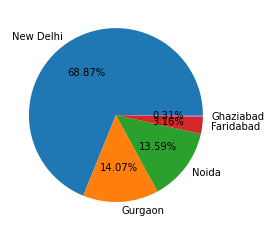

In [44]:
#representing the city in pie chart representation
plt.pie(df["City"].value_counts().head(5),labels=df["City"].value_counts().head(5).index,autopct="%1.2f%%")
plt.show()

### New Delhi has the most no. of orders from all the cities



## Extracing top-10 cuisines


In [45]:
#the most famous and regularly ordered cuisines on zomato
top_cuisines=df["Cuisines"].value_counts()[:10]
top_cuisines

North Indian                      936
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

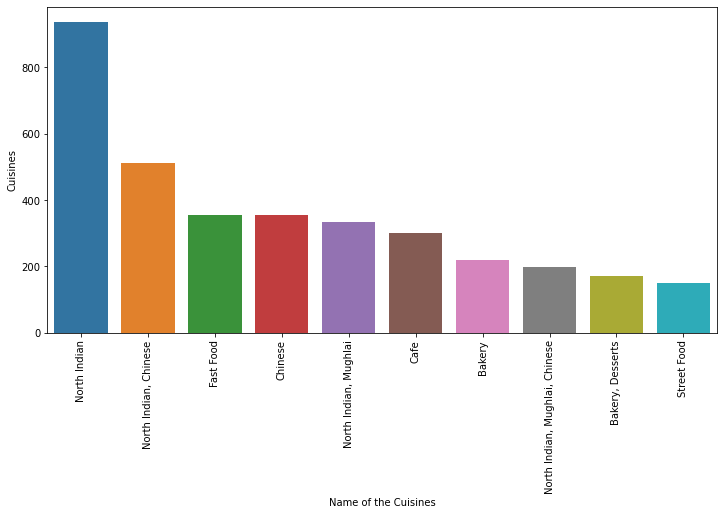

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(y=top_cuisines,x= top_cuisines.index)
plt.xticks(rotation=90)
plt.xlabel("Name of the Cuisines")
plt.show()

### North Indian was the most ordered food online on zomato



## 25 costly restaurants for 2 people around the globe

In [47]:
costly_zomato = df.nlargest(25, 'Average Cost for two')
costly_zomato.head()


,Country,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
8747,Indonesia,Skye,Jakarta,"Grand Indonesia Mall, Thamrin",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
8748,Indonesia,Satoo - Hotel Shangri-La,Jakarta,"Hotel Shangri-La, Sudirman",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
8751,Indonesia,Sushi Masa,Jakarta,Penjaringan,106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
8753,Indonesia,3 Wise Monkeys,Jakarta,Senopati,106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
8758,Indonesia,Avec Moi Restaurant and Bar,Jakarta,Thamrin,106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [48]:
costly_zomato.columns


Index(['Country', 'Restaurant Name', 'City', 'Locality', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

<AxesSubplot:xlabel='Average Cost for two', ylabel='Restaurant Name'>

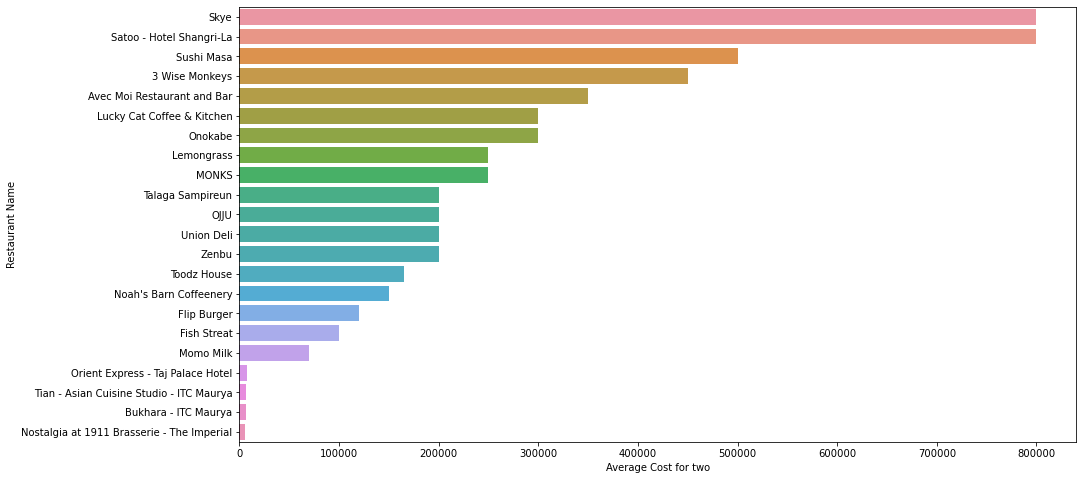

In [49]:
plt.figure(figsize=(15,8))
sns.barplot(y='Restaurant Name',x='Average Cost for two',data=costly_zomato)

In [50]:
price_zomato = df.nlargest(25, 'Price range')
price_zomato.head()


,Country,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
5,India,MoMo Cafe,Agra,"Courtyard by Marriott Agra, Tajganj",0.000000,0.000000,"North Indian, European",2000,Indian Rupees(Rs.),No,No,4,4.0,Green,Very Good,45
6,India,Peshawri - ITC Mughal,Agra,"ITC Mughal, Tajganj",78.044095,27.160934,"North Indian, Mughlai",2500,Indian Rupees(Rs.),No,No,4,4.3,Green,Very Good,133
7,India,Taj Bano - ITC Mughal,Agra,"ITC Mughal, Tajganj",78.044095,27.160934,Mughlai,2500,Indian Rupees(Rs.),No,No,4,4.0,Green,Very Good,41
9,India,Dawat-e-Nawab - Radisson Blu,Agra,"Radisson Blu, Tajganj",78.057044,27.163303,"North Indian, Mughlai",3600,Indian Rupees(Rs.),No,No,4,3.8,Yellow,Good,46
14,India,Bon Barbecue,Agra,Tajganj,0.000000,0.000000,"North Indian, Chinese, Continental",1500,Indian Rupees(Rs.),No,No,4,3.8,Yellow,Good,57


<AxesSubplot:xlabel='Price range', ylabel='Restaurant Name'>

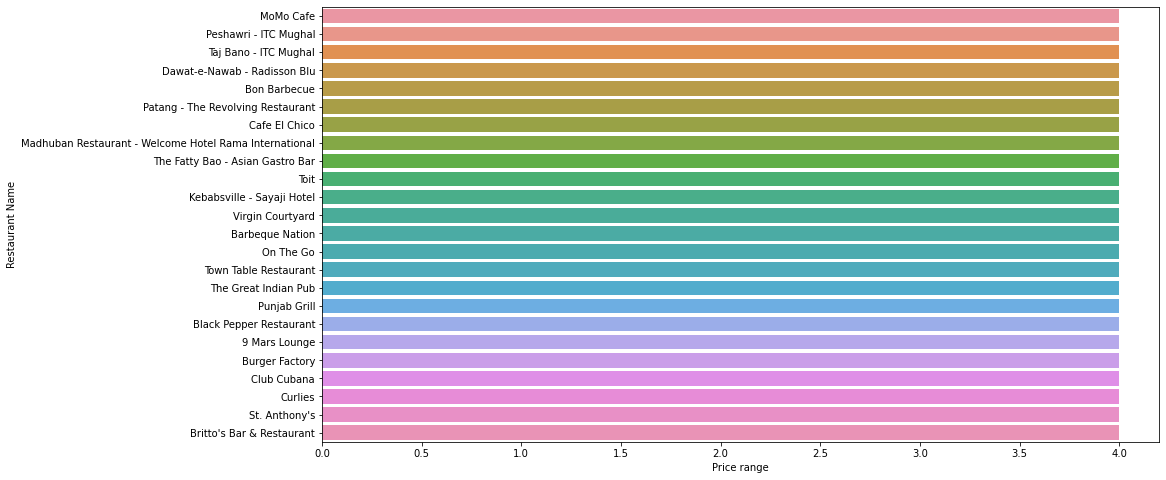

In [51]:
plt.figure(figsize=(15,8))
sns.barplot(y='Restaurant Name',x='Price range',data=price_zomato)

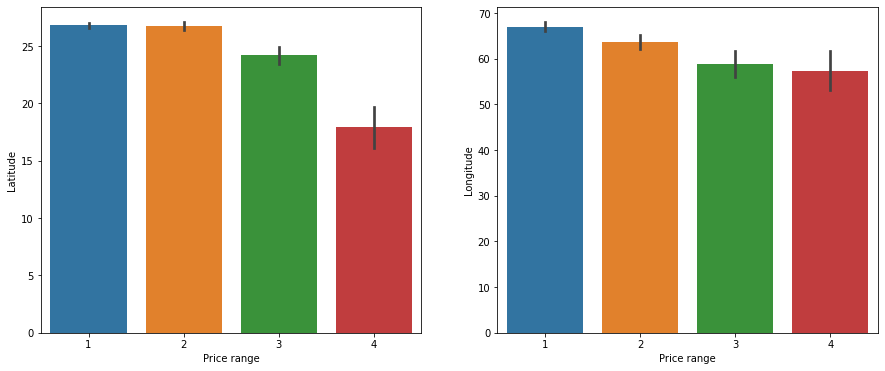

In [52]:
# let's visualize the longitude and latitude with primary_fuel
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(y='Latitude',x = 'Price range',data = df)
plt.subplot(1,2,2)
sns.barplot(y='Longitude',x = 'Price range',data = df)
plt.show()


In [53]:
df.shape

(9551, 16)

In [54]:
df.head()

,Country,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,India,Jahanpanah,Agra,Agra Cantt,78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,3,3.9,Yellow,Good,140
1,India,Rangrezz Restaurant,Agra,Agra Cantt,0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,2,3.5,Yellow,Good,71
2,India,Time2Eat - Mama Chicken,Agra,Agra Cantt,78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,2,3.6,Yellow,Good,94
3,India,Chokho Jeeman Marwari Jain Bhojanalya,Agra,Civil Lines,77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,2,4.0,Green,Very Good,87
4,India,Pinch Of Spice,Agra,Civil Lines,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,3,4.2,Green,Very Good,177


In [55]:
# converting text into numbers using label encoder
from sklearn.preprocessing import LabelEncoder
cat=[i for i in df.columns if df[i].dtypes=='O']
enc = LabelEncoder()
for i in cat:
    df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               9551 non-null   int32  
 1   Restaurant Name       9551 non-null   int32  
 2   City                  9551 non-null   int32  
 3   Locality              9551 non-null   int32  
 4   Longitude             9551 non-null   float64
 5   Latitude              9551 non-null   float64
 6   Cuisines              9551 non-null   int32  
 7   Average Cost for two  9551 non-null   int64  
 8   Currency              9551 non-null   int32  
 9   Has Table booking     9551 non-null   int32  
 10  Has Online delivery   9551 non-null   int32  
 11  Price range           9551 non-null   int64  
 12  Aggregate rating      9551 non-null   float64
 13  Rating color          9551 non-null   int32  
 14  Rating text           9551 non-null   int32  
 15  Votes                

In [57]:
# Cuisines missing values are filled with mode
df['Cuisines']=df['Cuisines'].fillna(df["Cuisines"].mode()[0])


In [58]:
df.isna().sum()

Country                 0
Restaurant Name         0
City                    0
Locality                0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [98]:
df['Price range'].value_counts()

1    4302
2    2909
3    1194
4     534
Name: Price range, dtype: int64

## Correlation


In [59]:
df.corr()

,Country,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
Country,1.000000,0.017560,-0.180959,-0.118784,-0.766221,0.181299,-0.124141,-0.004034,-0.105296,-0.062076,-0.140464,0.178035,0.255591,-0.155486,0.203846,0.155161
Restaurant Name,0.017560,1.000000,-0.001399,0.004322,-0.001920,0.009922,0.051496,0.019241,0.009669,0.041173,0.028082,0.061275,0.029367,-0.007311,0.012131,0.018512
City,-0.180959,-0.001399,1.000000,0.096444,0.117391,-0.004301,0.025764,-0.028838,-0.071996,-0.003762,0.012723,-0.105759,-0.132163,0.110887,-0.098985,-0.078406
Locality,-0.118784,0.004322,0.096444,1.000000,0.086448,-0.020424,0.006499,-0.012136,0.023723,-0.065594,-0.030993,-0.114459,-0.174336,0.036831,-0.036969,-0.123569
Longitude,-0.766221,-0.001920,0.117391,0.086448,1.000000,0.043207,0.122457,0.045891,0.337334,0.100488,0.178757,-0.078939,-0.116818,0.059979,-0.181466,-0.085101
Latitude,0.181299,0.009922,-0.004301,-0.020424,0.043207,1.000000,0.038646,-0.111088,-0.101864,0.054658,0.118722,-0.166688,0.000516,0.042590,-0.129447,-0.022962
Cuisines,-0.124141,0.051496,0.025764,0.006499,0.122457,0.038646,1.000000,0.005755,0.066783,0.050232,-0.017180,-0.005489,-0.079494,-0.016180,-0.080025,-0.032362
Average Cost for two,-0.004034,0.019241,-0.028838,-0.012136,0.045891,-0.111088,0.005755,1.000000,0.045615,0.007758,-0.018974,0.075083,0.051792,-0.049970,0.031439,0.067783
Currency,-0.105296,0.009669,-0.071996,0.023723,0.337334,-0.101864,0.066783,0.045615,1.000000,0.000640,0.006991,0.075179,-0.006939,-0.040430,0.014598,-0.027111
Has Table booking,-0.062076,0.041173,-0.003762,-0.065594,0.100488,0.054658,0.050232,0.007758,0.000640,1.000000,0.101224,0.501925,0.189998,-0.021365,0.044043,0.169422


In [60]:
# let's check the correation with Price range
df.corr()['Price range'].sort_values()


Latitude               -0.166688
Rating color           -0.140468
Locality               -0.114459
City                   -0.105759
Longitude              -0.078939
Cuisines               -0.005489
Restaurant Name         0.061275
Average Cost for two    0.075083
Currency                0.075179
Has Online delivery     0.077918
Rating text             0.164242
Country                 0.178035
Votes                   0.309444
Aggregate rating        0.437944
Has Table booking       0.501925
Price range             1.000000
Name: Price range, dtype: float64

In [61]:
# let's check the correation with Average Cost for two
df.corr()['Average Cost for two'].sort_values()


Latitude               -0.111088
Rating color           -0.049970
City                   -0.028838
Has Online delivery    -0.018974
Locality               -0.012136
Country                -0.004034
Cuisines                0.005755
Has Table booking       0.007758
Restaurant Name         0.019241
Rating text             0.031439
Currency                0.045615
Longitude               0.045891
Aggregate rating        0.051792
Votes                   0.067783
Price range             0.075083
Average Cost for two    1.000000
Name: Average Cost for two, dtype: float64

<AxesSubplot:>

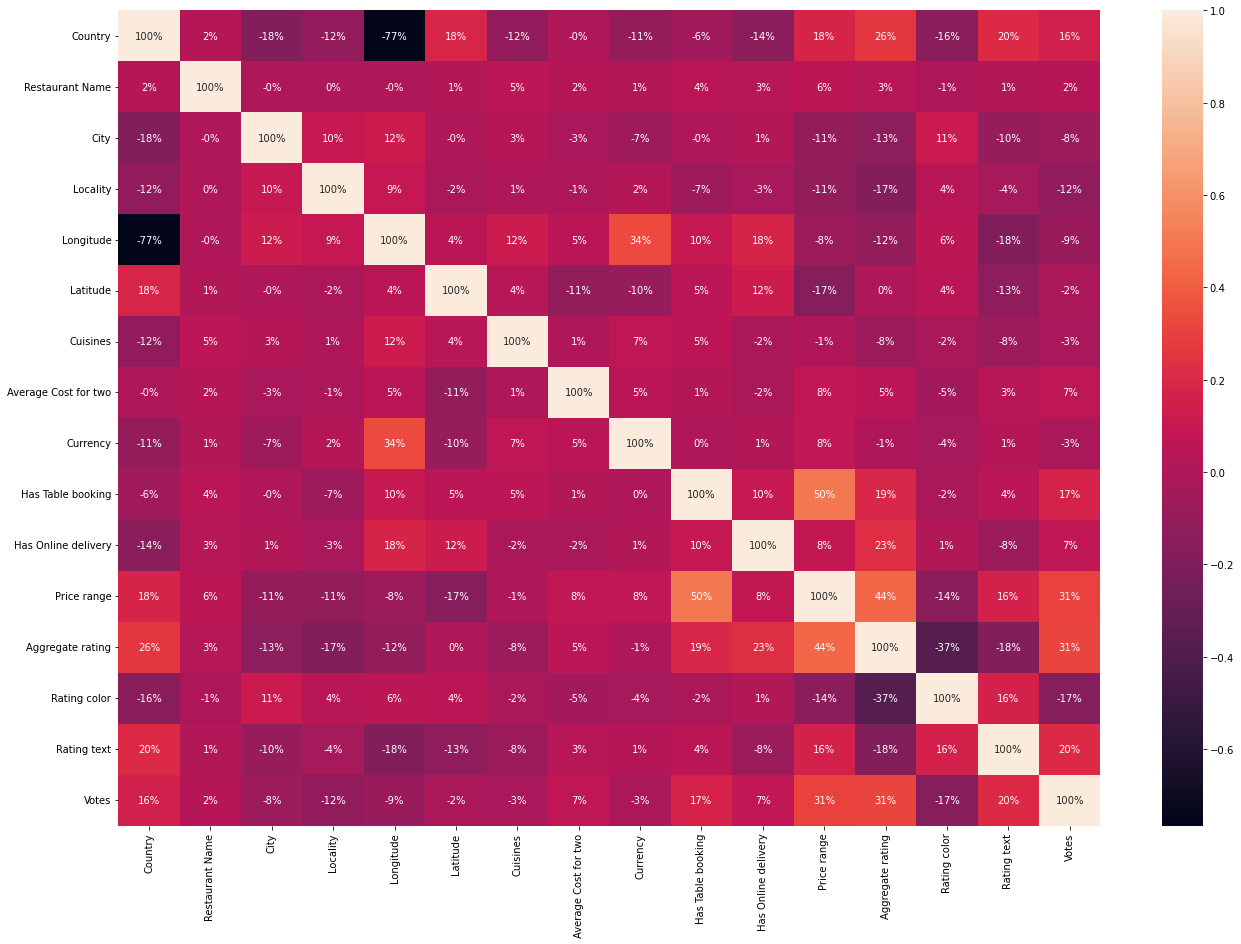

In [62]:
# let's check correlation using heatmap
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(),annot =True,fmt  = '.0%')

## Obserrvations:-
- City,Locality,longitude,latitude,Cuisines and Rating color  are negatively correlated with target.
- Country,Restaurant Name,average cost for two,currency,has table booking,has online delivery,aggregate rating,rating text and   votes are positively correlated with target variable
- maximum correlation : Has table booking
- minimum correlation : restaurant name                              
                                  

In [63]:
df.drop(columns=['Currency'],inplace =True)

In [68]:
df.drop(columns=['Latitude','City','Country'],inplace =True)

In [69]:
df.head()

,Restaurant Name,Locality,Longitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3201,17,78.011544,1514,850,0,0,3,3.9,5,2,140
1,5261,17,0.000000,1514,700,0,0,2,3.5,5,2,71
2,6919,17,78.011608,1306,500,0,0,2,3.6,5,2,94
3,1637,204,77.998092,1645,400,0,0,2,4.0,1,5,87
4,4922,204,78.007553,1373,1000,0,0,3,4.2,1,5,177


## Normal Distribution curve for every individual column


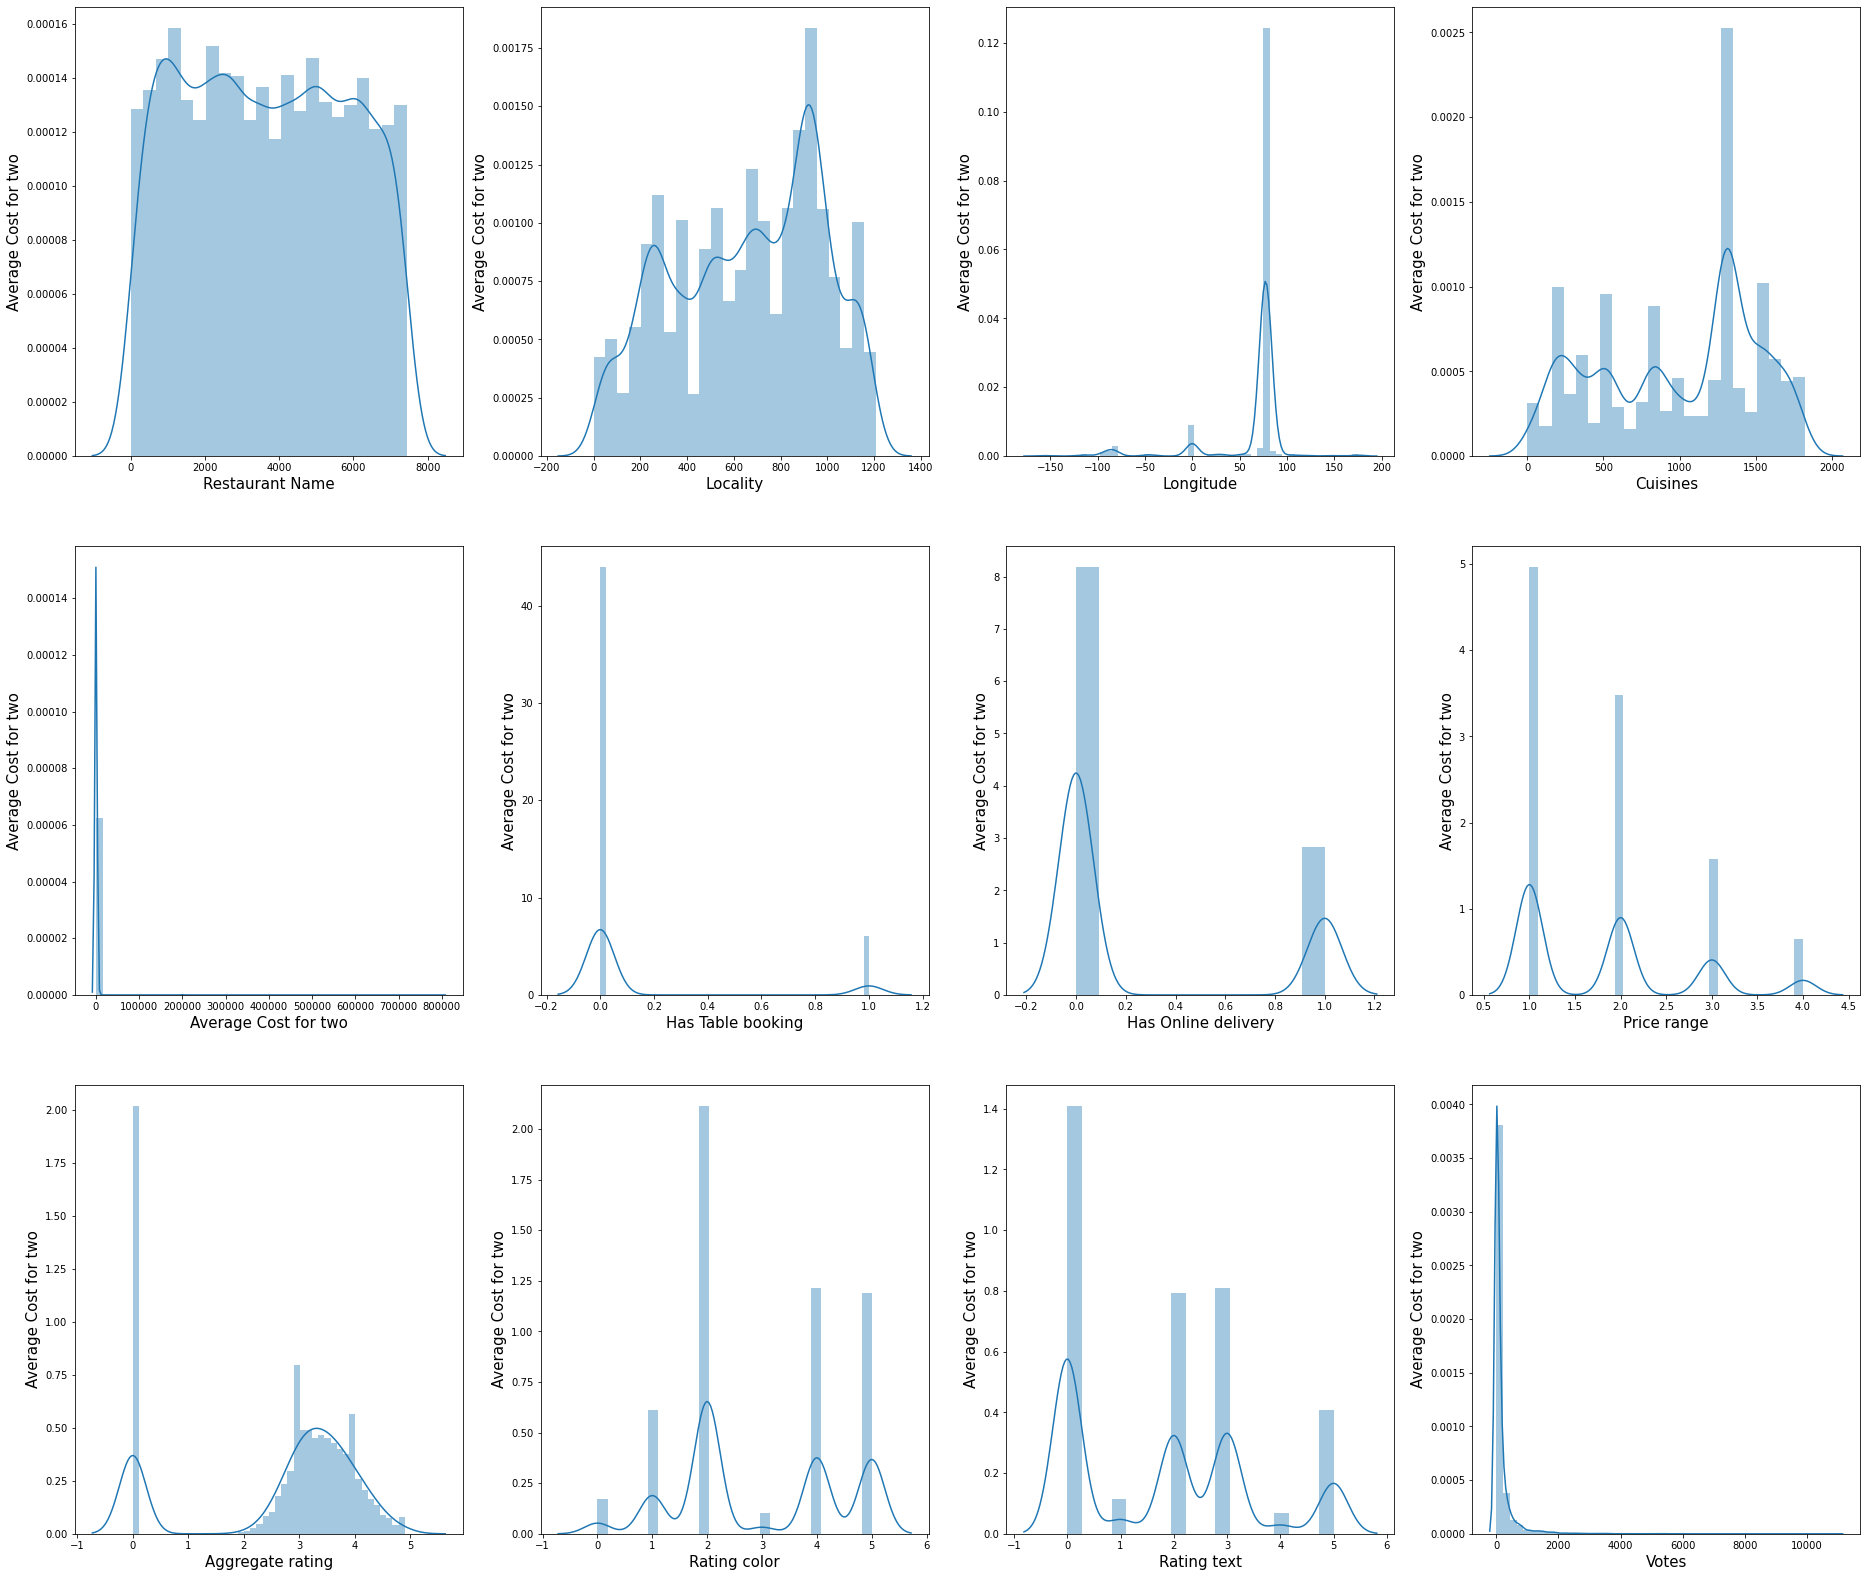

In [70]:
# let's visualize the data using distribution plot
plt.figure(figsize=(32,38))
pn = 1
for col in df:
    if pn <= 15:
        ax = plt.subplot(4,4,pn)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 15)
        plt.ylabel('Average Cost for two',fontsize = 15)
    pn +=1
plt.show()    

### Votes, Average Cost for two and longitude features are indicating the presence of outliers.skewness is also present 


### Checking Outliers


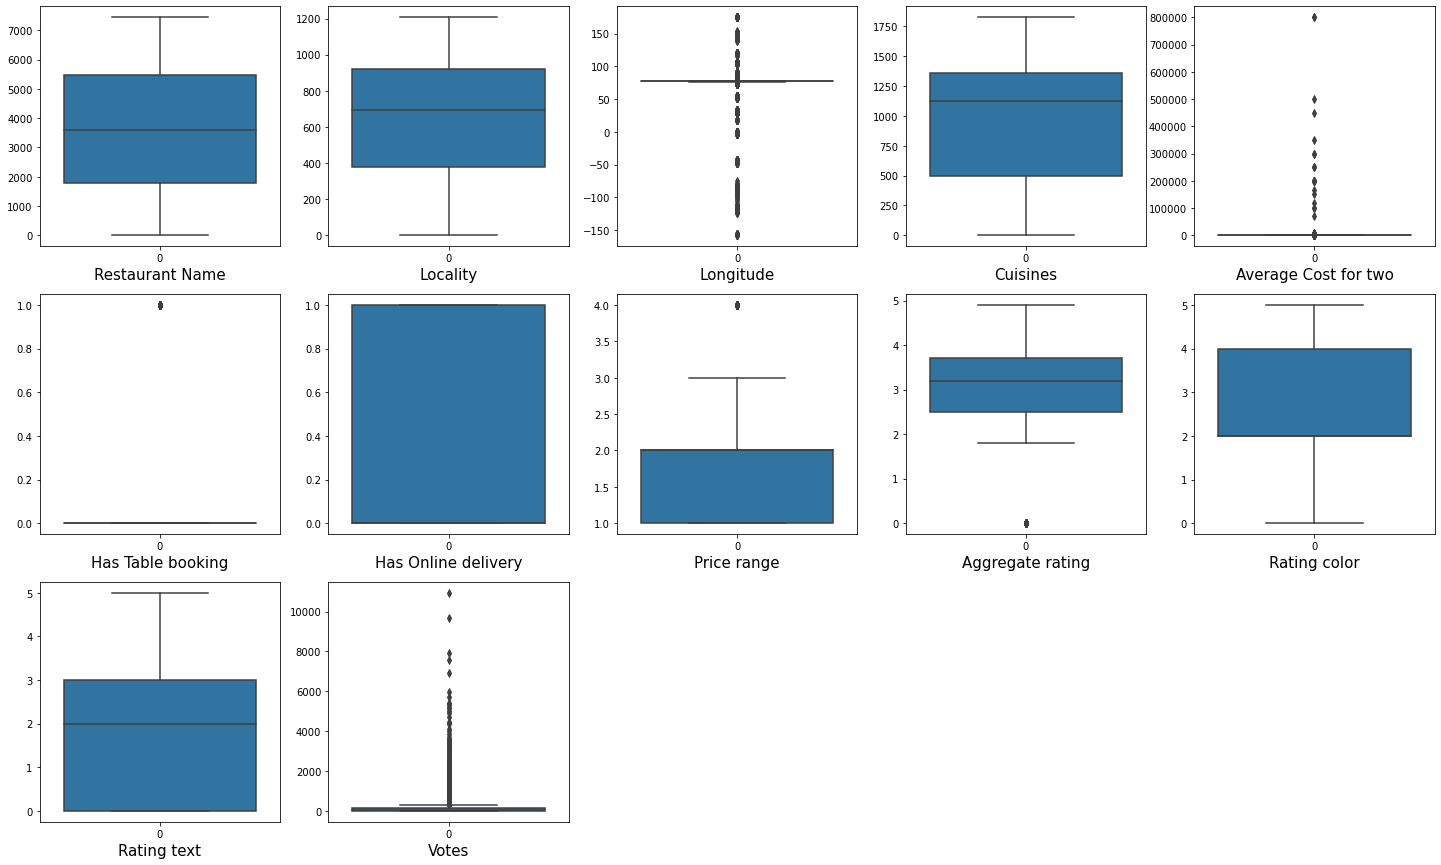

In [71]:
plt.figure(figsize=(25,15))
pn = 1
for col in df:
    if pn <=15:
        ax = plt.subplot(3,5,pn)
        sns.boxplot(data=df[col])
        plt.xlabel(col,fontsize = 15)
    pn +=1
plt.show()    

### as per my observation, Votes, Average Cost for two and longitude features are indicating the presence of outliers. we will remove the outliers by using zscore technique 

## Removing Outliers


In [72]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (9551, 12)
Shape of the dataframe after removing outliers:  (8939, 12)
Percentage of data loss post outlier removal:  6.407705999371793


## Skewness

In [73]:
df.skew()

Restaurant Name         0.042927
Locality               -0.297919
Longitude              -2.255300
Cuisines               -0.325953
Average Cost for two    3.667851
Has Table booking       2.301639
Has Online delivery     1.048839
Price range             0.962758
Aggregate rating       -0.897557
Rating color            0.062846
Rating text             0.440156
Votes                   3.501553
dtype: float64

## Dividing data in features and label


In [74]:
x = df.drop('Average Cost for two',axis = 1)
x.head()

,Restaurant Name,Locality,Longitude,Cuisines,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3201,17,78.011544,1514,0,0,3,3.9,5,2,140
1,5261,17,0.000000,1514,0,0,2,3.5,5,2,71
2,6919,17,78.011608,1306,0,0,2,3.6,5,2,94
3,1637,204,77.998092,1645,0,0,2,4.0,1,5,87
4,4922,204,78.007553,1373,0,0,3,4.2,1,5,177


In [75]:
y=df['Average Cost for two']

### Removal of skewness using Power Transformer as values are negative we are using 'yeo-johnson' method for removing skewness

In [76]:
from sklearn.preprocessing import PowerTransformer
p_transform = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(p_transform.fit_transform(x), columns=x.columns)
x.head(10)

,Restaurant Name,Locality,Longitude,Cuisines,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,-0.088653,-2.119002,0.244312,1.000370,-0.373821,-0.604794,1.319236,0.971177,1.339937,0.442995,0.934162
1,0.772711,-2.119002,-2.878655,1.000370,-0.373821,-0.604794,0.609383,0.596424,1.339937,0.442995,0.573795
2,1.388115,-2.119002,0.244315,0.603242,-0.373821,-0.604794,0.609383,0.688005,1.339937,0.442995,0.721741
3,-0.872950,-1.502400,0.243549,1.248698,-0.373821,-0.604794,0.609383,1.068348,-1.451942,1.535099,0.680796
4,0.639648,-1.502400,0.244085,0.731568,-0.373821,-0.604794,1.319236,1.266811,-1.451942,1.535099,1.060441
5,0.350609,-1.430566,-2.878655,0.849968,-0.373821,-0.604794,1.709608,1.068348,-1.451942,1.535099,0.336715
6,0.630914,-0.686754,0.246158,1.000370,-0.373821,-0.604794,1.709608,1.368086,-1.451942,1.535099,0.906659
7,1.144712,-0.686754,0.246158,0.543729,-0.373821,-0.604794,1.709608,1.068348,-1.451942,1.535099,0.288880
8,-0.396018,-0.434581,-2.878655,1.250589,-0.373821,-0.604794,1.319236,0.688005,1.339937,0.442995,0.477015
9,-0.729868,0.515592,0.246892,1.000370,-0.373821,-0.604794,1.709608,0.875391,1.339937,0.442995,0.348039


In [77]:
pd.DataFrame(x).skew().sort_values()

Aggregate rating      -0.612877
Cuisines              -0.368229
Locality              -0.308060
Restaurant Name       -0.272578
Rating color          -0.090225
Rating text           -0.041441
Votes                 -0.014532
Longitude              0.030498
Price range            0.211289
Has Online delivery    1.048839
Has Table booking      2.301639
dtype: float64

### Every value will be reduced after transformation


In [78]:
# data scaling formula z = (x-mean)/std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled

array([[-0.08865344, -2.11900168,  0.24431174, ...,  1.33993713,
         0.44299453,  0.93416162],
       [ 0.772711  , -2.11900168, -2.8786555 , ...,  1.33993713,
         0.44299453,  0.57379495],
       [ 1.38811544, -2.11900168,  0.24431535, ...,  1.33993713,
         0.44299453,  0.72174144],
       ...,
       [ 0.877505  ,  1.11568279, -2.89305864, ..., -1.45194176,
         1.53509932,  1.85237411],
       [ 0.39422134,  1.31113583, -2.89303895, ..., -1.45194176,
         1.53509932,  0.54340944],
       [ 1.27156418,  1.31113583, -2.89303917, ..., -1.45194176,
         1.53509932,  0.82426986]])

## Final features Multi-Collinearity Check using VIF**


In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,Restaurant Name,1.008599
1,Locality,1.038873
2,Longitude,1.041850
3,Cuisines,1.028286
4,Has Table booking,1.312216
5,Has Online delivery,1.167228
6,Price range,1.725995
7,Aggregate rating,4.588141
8,Rating color,1.361181
9,Rating text,1.323060


### There is no sign of Multi-collinearity

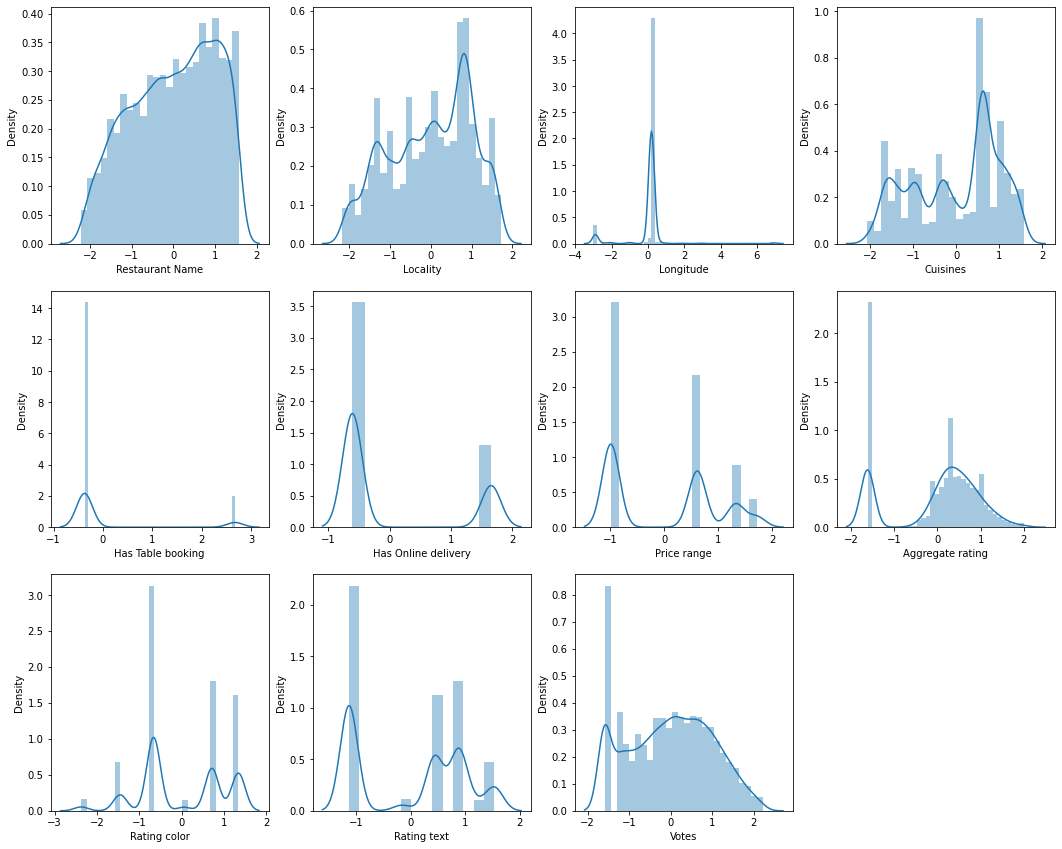

In [80]:
# let's visualize the data after correcting skewness
plt.figure(figsize=(18,20))
plotnumber=1
for column in x:
    if plotnumber<=16:
        plt.subplot(4,4,plotnumber)
        ax=sns.distplot(x[column])
        
    plotnumber+=1
    
plt.show()    

### Skewness has been corrected and data is distributed normally. Now ,our model is ready for model building


# Model selection/predictions


## Regression because our Target variable 'Average Cost for two' is continuous.


### Finding the best Random state and maximum accuracy

In [81]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [82]:
maxAccu=0
maxRS=0

for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    knn=KNeighborsRegressor()
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.7209406617982489 on Random State 266


**Splitting the data into Training and Testing**


In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=241)

**I am defining a function for splitting of the Training and Testing features alongwith Target, then it trains the model soon after training it predicts the Target and calculates RMSE score with R2 score alongwith this it calculates the Cross Validation score and finally it finds the difference between the R2 score and Cross Validation score.**

In [91]:
# Regression Model Function

def reg(model, x, y):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=205)
    
    #Training the model
    model.fit(X_train, Y_train)
    
    #Predicting Y_test
    pred = model.predict(X_test)
    
    #RMSE
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    #R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    #CV Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    #Difference
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

## Linear Regression


In [92]:
#Linear regression
model=LinearRegression()
reg(model, x, y)

RMSE Score is: 383.60494281106673
R2 Score is: 53.620993335044496
Cross Validation Score: 39.98516760498662
R2 Score - Cross Validation Score is 13.635825730057874


**Ridge Regression**

In [93]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, x, y)

RMSE Score is: 383.45852339516404
R2 Score is: 53.65639168532381
Cross Validation Score: 40.22219113831003
R2 Score - Cross Validation Score is 13.43420054701378


## Decision Tree Regressor


In [186]:
# Decision Tree Regressor
model=DecisionTreeRegressor()
reg(model, x, y)

RMSE Score is: 230.9331446589094
R2 Score is: 85.31788608328401
Cross Validation Score: 46.36105929196334
R2 Score - Cross Validation Score is 38.956826791320665


## Random Forest Regressor


In [189]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, x, y)

RMSE Score is: 406.19796716667196
R2 Score is: 54.575355021740116
Cross Validation Score: 52.11400596838256
R2 Score - Cross Validation Score is 2.4613490533575586


## KNeighbors Regressor

In [90]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model,x,y)

RMSE Score is: 374.93510240873627
R2 Score is: 55.91322082439165
Cross Validation Score: 39.98516760498662
R2 Score - Cross Validation Score is 15.92805321940503


## Support Vector Regression


In [195]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, x, y)

RMSE Score is: 437.8937112407761
R2 Score is: 38.039427035096566
Cross Validation Score: 34.121167617980795
R2 Score - Cross Validation Score is 3.9182594171157703


 ###  as per my observation , I choose Random Forest as the best model and model accuracy and cross val score difference  is also least.



## HYPERPARAMETER TUNING


In [201]:
rf=RandomForestRegressor()


In [197]:
params = {'n_jobs':[20],
         'warm_start':[True,False],
         'oob_score':[True,False],
         'min_samples_split':[2,5],
         'min_samples_leaf':[2,4],
         'criterion':['squared_error'],
         'max_leaf_nodes':[5]}

In [198]:
grd = GridSearchCV(rf,param_grid = params)
grd.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'], 'max_leaf_nodes': [5],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5], 'n_jobs': [20],
                         'oob_score': [True, False],
                         'warm_start': [True, False]})

In [199]:
rf = grd.best_estimator_
rf.fit(X_train,Y_train)

RandomForestRegressor(max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5,
                      n_jobs=20, warm_start=True)

In [200]:
pred = rf.predict(X_test)
r2_score(Y_test,pred)*100

76.17877700923489

# save the final model


In [202]:
import joblib
joblib.dump(rf,'Zomato.pkl')

['Zomato.pkl']

# Model selection/predictions


## Classification because our Target variable 'Price range' is categorical.

In [99]:
### Dividing data in features and label
x1 = df.drop('Price range',axis = 1)
x1.head()

,Restaurant Name,Locality,Longitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Aggregate rating,Rating color,Rating text,Votes
0,3201,17,78.011544,1514,850,0,0,3.9,5,2,140
1,5261,17,0.000000,1514,700,0,0,3.5,5,2,71
2,6919,17,78.011608,1306,500,0,0,3.6,5,2,94
3,1637,204,77.998092,1645,400,0,0,4.0,1,5,87
4,4922,204,78.007553,1373,1000,0,0,4.2,1,5,177


In [100]:
y1=df['Price range']
y1.head()

0    3
1    2
2    2
3    2
4    3
Name: Price range, dtype: int64

## Best Random State


In [101]:
# lets import all necessary libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,accuracy_score

In [79]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(x1, y1, test_size=0.20, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 0.9090909090909091 on Random State 455


In [104]:
# create empty lits
accur_score=[]
c_v_score=[]
diff=[]

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size= 0.20,random_state = 218)

In [125]:
# classification model Function
def classify(model,x1,y1):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size= 0.20,random_state = 469)
    # training the model
    model.fit(x_train,y_train)
    
    # predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy score
    acc_score=(accuracy_score(y_test,pred))*100
    accur_score.append(acc_score)
    print('Accuracy score',acc_score)
    
    # Classification report
    class_report=classification_report(y_test,pred)
    print('\nClassification Report:\n',class_report)
    
    # Cross validation score
    cv_score=(cross_val_score(model,x1,y1,cv=15).mean())*100
    c_v_score.append(cv_score)
    print('Cross validation score',cv_score)
    
    # result of accuracy score minus cv_score
    result = acc_score-cv_score
    diff.append(result)
    print('\n Accuracy score - cross val score is:',result)

     # Confusion_matrix
    plt.figure(figsize=(4,3))
    print("\n\n",sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt = "d",linecolor="k",linewidths=3))
    plt.title("CONFUSION MATRIX",fontsize=14)
    plt.show()


## KNN


Accuracy score 85.62639821029083

Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.97      0.91       886
           2       0.85      0.83      0.84       566
           3       0.87      0.65      0.75       225
           4       0.89      0.52      0.66       111

    accuracy                           0.86      1788
   macro avg       0.87      0.74      0.79      1788
weighted avg       0.86      0.86      0.85      1788

Cross validation score 84.02246536198373

 Accuracy score - cross val score is: 1.603932848307096


 AxesSubplot(0.125,0.125;0.62x0.755)


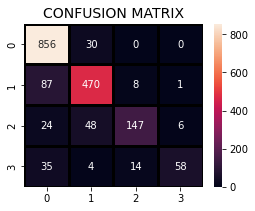

In [113]:
model = KNeighborsClassifier()
classify(model,x1,y1)

### After setting the random state = 455 , We got the accuracy score is 86%


## Random Forest


Accuracy score 96.02908277404921

Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       867
           2       0.95      0.98      0.97       576
           3       0.89      0.91      0.90       237
           4       0.93      0.75      0.83       108

    accuracy                           0.96      1788
   macro avg       0.94      0.91      0.92      1788
weighted avg       0.96      0.96      0.96      1788

Cross validation score 94.02333013742408

 Accuracy score - cross val score is: 2.0057526366251324


 AxesSubplot(0.125,0.125;0.62x0.755)


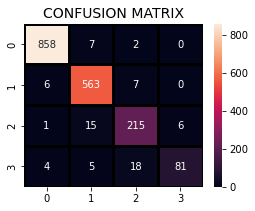

In [107]:
model =RandomForestClassifier()
classify(model,x1,y1)

### After setting the random state = 218 , We got the accuracy score is 96%


## AdaBoost

Accuracy score 79.69798657718121

Classification Report:
               precision    recall  f1-score   support

           1       0.98      1.00      0.99       835
           2       0.66      0.90      0.76       602
           3       0.42      0.06      0.11       236
           4       0.40      0.30      0.34       115

    accuracy                           0.80      1788
   macro avg       0.61      0.56      0.55      1788
weighted avg       0.76      0.80      0.76      1788

Cross validation score 79.60455323068824

 Accuracy score - cross val score is: 0.09343334649297219


 AxesSubplot(0.125,0.125;0.62x0.755)


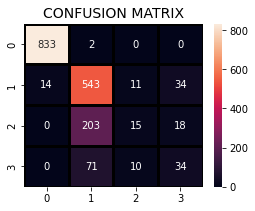

In [126]:
model=AdaBoostClassifier()
classify(model,x1,y1)

### After setting the random state = 469, We got the accuracy score is 80%


## Decision tree

Accuracy score 96.36465324384787

Classification Report:
               precision    recall  f1-score   support

           1       0.99      1.00      1.00       865
           2       0.97      0.96      0.96       570
           3       0.91      0.89      0.90       257
           4       0.81      0.85      0.83        96

    accuracy                           0.96      1788
   macro avg       0.92      0.93      0.92      1788
weighted avg       0.96      0.96      0.96      1788

Cross validation score 93.9005132254244

 Accuracy score - cross val score is: 2.464140018423464


 AxesSubplot(0.125,0.125;0.62x0.755)


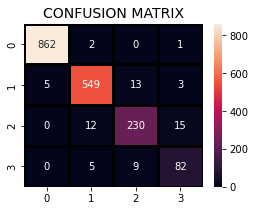

In [111]:
model=DecisionTreeClassifier()
classify(model,x1,y1)

### After setting the random state = 209 , We got the accuracy score is 96%


## Compare the models


In [114]:
# create a list of labels of build models
label = ['Random Forest','AdaBoost','Decision Tree','KNN']
print(label)
print(accur_score)
print(c_v_score)
print(diff)


['Random Forest', 'AdaBoost', 'Decision Tree', 'KNN']
[96.02908277404921, 79.69798657718121, 96.36465324384787, 85.62639821029083]
[94.02333013742408, 79.60455323068824, 93.9005132254244, 84.02246536198373]
[2.0057526366251324, 0.09343334649297219, 2.464140018423464, 1.603932848307096]


In [115]:
# create dataframe
score_df = pd.DataFrame({'Model name':label,'Accuracy Score':accur_score,'Cross validation Score':c_v_score,'Difference':diff})
score_df

,Model name,Accuracy Score,Cross validation Score,Difference
0,Random Forest,96.029083,94.023330,2.005753
1,AdaBoost,79.697987,79.604553,0.093433
2,Decision Tree,96.364653,93.900513,2.464140
3,KNN,85.626398,84.022465,1.603933


 ###  as per my observation , I choose Adaboost as the best model and model accuracy and cross val score difference  is also least.


## Hperparameter Tuning of final model

In [127]:
ada = AdaBoostClassifier()


In [128]:
params = {
    'n_estimators':[100],
    'learning_rate':[0.1,1.0],
    'random_state':[30,40,50],
     'algorithm':['SAMME','SAMME.R']}

In [129]:
grd = GridSearchCV(ada,param_grid = params)
grd.fit(X_train,Y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 1.0], 'n_estimators': [100],
                         'random_state': [30, 40, 50]})

In [130]:
ada = grd.best_estimator_
ada.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=30)

In [131]:
pred = ada.predict(X_test)
accuracy_score(Y_test,pred)

0.20134228187919462

# Save the final model


In [132]:
import joblib
joblib.dump(ada,'Zomato.pkl')

['Zomato.pkl']